# Systemy uczące się - Zad. dom. 4: Ocena modeli predykcyjnych

### Autor rozwiązania
Uzupełnij poniższe informacje umieszczając swoje imię i nazwisko oraz numer indeksu:

In [1]:
NAME = "Mikołaj Nowak"
ID = "151813"

Ten notebook zawiera zadania związane z oceną modeli predykcyjnych. Oprócz zadań programistycznych, notebook zawira również pytania, na które trzeba odpowiedzieć. Odpowiedzi nie muszą być długie, ale powinny być merytoryczne i odnosić się do omawianych zagadnień. W tym zadaniu domowym należy odpowiedzieć na WSZYSTKIE pytania.


## Format danych
W tym zadaniu domyślnym typem danych będą macierze (`np.ndarray`) o rozmiarze `(n, c)`, gdzie `n` to liczba obserwacji, a `c` to liczba klas. Wartości w macierzy będą reprezentować:

- w przypadku `y` - prawdziwe klasy (wartości binarne). Na przykład:
    ```
    [
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
    ]
    ```
    oznacza, że pierwsza i trzecia obserwacja należą do klasy 0, a druga do klasy 2. 

- w przypadku `y_hat` - predykcje modelu. Wartości w macierzy mogą reprezentować:
    * prawdopodobieństwa przynależności do danej klasy (wartości z przedziału `[0, 1]`). Na przykład:
        ```
        [
            [0.9, 0.1, 0.0],
            [0.1, 0.2, 0.7],
            [0.8, 0.2, 0.0],
        ]
        ```
        oznacza, że model przewiduje, że pierwsza obserwacja należy do klasy 0 z prawdopodobieństwem 0.9, a do klasy 1 z prawdopodobieństwem 0.1.
    
    * predykcje (wartości binarne), gdzie wartość `1` oznacza przynależność do danej klasy, a wartość `0` jej brak.
        ```
        [
            [0, 1, 0],
            [0, 0, 1],
            [0, 1, 0],
        ]
        ```
        oznacza, że model przewiduje, że pierwsza obserwacja należy do klasy 1, a druga do klasy 2.

# Zadanie 1: Punktowe miary oceny klasyfikatorów

Zadanie polega na zaimplementowaniu funkcji obliczających punktowe miary oceny klasyfikatorów, takich jak:
- dokładność (accuracy),
- precyzja (precision),
- czułość (recall),
- specyficzność (specificity),
- F1,
- G-mean,
- balanced accuracy.

Uwagi:
- Do rozwiązania zadania można wykorzystać wyłącznie bibliotekę `numpy`.
- Na potrzeby zadania domowego można założyć, że klasyfikacja jest wieloklasowa, ale jednoetykietowa (tj. każda obserwacja należy do dokładnie jednej klasy).
- W przypadku, gdy mianownik w równaniu miary oceny jest równy 0, wartość miary powinna wynosić 0.
- Podpowiedź: przy obliczaniu wielu miar warto zaimplementować funkcję pomocniczą, która oblicza macierz pomyłek.

In [2]:
from typing import Literal

import numpy as np

In [3]:
y = np.eye(2, dtype=int)[np.repeat([0, 1], 50)]
y_hat_0 = np.tile([1, 0], (100, 1))
y_hat_1 = np.tile([0, 1], (100, 1))

In [4]:
def accuracy(y_hat: np.ndarray, y: np.ndarray) -> float:
    """Funkcja obliczająca dokładność klasyfikacji (accuracy). Funkcja powinna wspierać klasyfikację wieloklasową.
    
    Args:
        y_hat (np.ndarray): Macierz z predykacjami modelu o wymiarach `(n, c)`.
        y (np.ndarray): Macierz z prawdziwymi klasami o wymiarach `(n, c)`.
        
    Returns:
        float: Dokładność klasyfikacji.
    """
    y_pred_labels = np.argmax(y_hat, axis=1)
    y_true_labels = np.argmax(y, axis=1)
    
    return np.mean(y_pred_labels == y_true_labels)

In [5]:
def precision(y_hat: np.ndarray, y: np.ndarray, average: Literal["micro", "macro"] = "micro") -> float:
    """Funkcja obliczająca precyzję klasyfikacji (precision). 
    Funkcja wspiera klasyfikację wieloklasową.

    Args:
        y_hat (np.ndarray): Macierz z predykcjami modelu o wymiarach `(n, c)`. 
        y (np.ndarray): Macierz z prawdziwymi klasami o wymiarach `(n, c)`. 
        average ("micro" | "macro"): Typ uśredniania wyników. Domyślnie "micro".
        
    Returns:
        float: Precyzja klasyfikacji.
    """
    y_pred_labels = np.argmax(y_hat, axis=1)
    y_true_labels = np.argmax(y, axis=1)
    num_classes = y.shape[1]

    TP = np.zeros(num_classes)
    FP = np.zeros(num_classes)

    for c in range(num_classes):
        TP[c] = np.sum((y_pred_labels == c) & (y_true_labels == c)) 
        FP[c] = np.sum((y_pred_labels == c) & (y_true_labels != c))

    precision_per_class = TP / (TP + FP + 1e-9)  # Avoid division by 0
    if average == "micro":
        return np.sum(TP) / (np.sum(TP) + np.sum(FP) + 1e-9)
    elif average == "macro":
        return np.mean(precision_per_class)

In [6]:
def recall(y_hat: np.ndarray, y: np.ndarray, average: Literal["micro", "macro"] = "micro") -> float:
    """Funkcja obliczająca czułość klasyfikacji (recall). Funkcja powinna wspierać klasyfikację wieloklasową.
    
    Args:
        y_hat (np.ndarray): Macierz z predykacjami modelu o wymiarach `(n, c)`. 
        y (np.ndarray): Macierz z prawdziwymi klasami o wymiarach `(n, c)`. 
        average ("micro" | "macro"): Typ uśredniania wyników. Domyślnie "micro".
        
    Returns:
        float: Precyzja klasyfikacji.
    """
    y_pred_labels = np.argmax(y_hat, axis=1)
    y_true_labels = np.argmax(y, axis=1)
    num_classes = y.shape[1]

    TP = np.zeros(num_classes)
    FN = np.zeros(num_classes)

    for c in range(num_classes):
        TP[c] = np.sum((y_pred_labels == c) & (y_true_labels == c)) 
        FN[c] = np.sum((y_pred_labels != c) & (y_true_labels == c))

    recall_per_class = TP / (TP + FN + 1e-9)  # Avoid division by 0
    if average == "micro":
        return np.sum(TP) / (np.sum(TP) + np.sum(FN) + 1e-9)
    elif average == "macro":
        return np.mean(recall_per_class)

In [7]:
def specificity(y_hat: np.ndarray, y: np.ndarray, average: Literal["micro", "macro"] = "micro") -> float:
    """Funkcja obliczająca specyficzność klasyfikacji (specificity). Funkcja powinna wspierać klasyfikację wieloklasową.
    
    Args:
        y_hat (np.ndarray): Macierz z predykacjami modelu o wymiarach `(n, c)`. 
        y (np.ndarray): Macierz z prawdziwymi klasami o wymiarach `(n, c)`. 
        average ("micro" | "macro"): Typ uśredniania wyników. Domyślnie "micro".
        
    Returns:
        float: Specyficzność klasyfikacji.
    """
    y_pred_labels = np.argmax(y_hat, axis=1)
    y_true_labels = np.argmax(y, axis=1)
    num_classes = y.shape[1]
    TN = np.zeros(num_classes)
    FP = np.zeros(num_classes)

    for c in range(num_classes):
        TN[c] = np.sum((y_pred_labels != c) & (y_true_labels != c))
        FP[c] = np.sum((y_pred_labels == c) & (y_true_labels != c))

    specificity_per_class = TN / (TN + FP + 1e-9)  # Avoid division by 0
    if average == "micro":
        return np.sum(TN) / (np.sum(TN) + np.sum(FP) + 1e-9)
    elif average == "macro":
        return np.mean(specificity_per_class) 


Zatrzymaj się w tym miejscu na chwilę i poeksperymentuj z dotychczas zaimplementowanymi funkcjami i danymi testowymi. Spróbuj zrozumieć, jak działają poszczególne miary oceny klasyfikatorów. Możesz ograniczyć się do uśredniania wyników "micro".

In [8]:
import pandas as pd

metrics = ["Accuracy", "Precision", "Recall", "Specificity"]
values_0 = [
    accuracy(y_hat_0, y),
    precision(y_hat_0, y),
    recall(y_hat_0, y),
    specificity(y_hat_0, y)
]

values_1 = [
    accuracy(y_hat_1, y),
    precision(y_hat_1, y),
    recall(y_hat_1, y),
    specificity(y_hat_1, y)
]

df = pd.DataFrame({"Metric": metrics, "y_hat_0": values_0, "y_hat_1": values_1})
print(df)

        Metric  y_hat_0  y_hat_1
0     Accuracy      0.5      0.5
1    Precision      0.5      0.5
2       Recall      0.5      0.5
3  Specificity      0.5      0.5


Odpowiedz na pytanie

1. Czy zaimplementowane funkcje mogą być wystarczające do oceny modeli klasyfikacyjnych? Jeśli nie, to dlaczego? Jeśli tak, to w jakich przypadkach?

Nie, zaimplementowane funkcje z reguły są niewystarczające do pełnej oceny modeli klasyfikacyjnych. Podstawowe metryki, takie jak accuracy, precision, recall i specificity, dają ogólny obraz działania modelu, ale mogą nie odzwierciedlać jego skuteczności w każdym przypadku. Bardzo uwypuklają one wady podejścia micro i macro averaging. Micro-averaging faworyzuje dominujące klasy, co może prowadzić do zawyżonej oceny modelu w nierównomiernych zbiorach danych. Macro-averaging traktuje każdą klasę jednakowo, ale nie uwzględnia różnic w rozkładzie klas.

In [9]:
def f1(y_hat: np.ndarray, y: np.ndarray, average: Literal["micro", "macro"] = "micro") -> float:
    """Funkcja obliczająca miarę F1. Funkcja powinna wspierać klasyfikację wieloklasową.
    
    Args:
        y_hat (np.ndarray): Macierz z predykacjami modelu o wymiarach `(n, c)`. 
        y (np.ndarray): Macierz z prawdziwymi klasami o wymiarach `(n, c)`. 
        average ("micro" | "macro"): Typ uśredniania wyników. Domyślnie "micro".
        
    Returns:
        float: Specyficzność klasyfikacji.
    """

    y_pred_labels = np.argmax(y_hat, axis=1)
    y_true_labels = np.argmax(y, axis=1)
    num_classes = y.shape[1]

    TP = np.zeros(num_classes)
    FP = np.zeros(num_classes)
    FN = np.zeros(num_classes)

    for c in range(num_classes):
        TP[c] = np.sum((y_pred_labels == c) & (y_true_labels == c))
        FP[c] = np.sum((y_pred_labels == c) & (y_true_labels != c))
        FN[c] = np.sum((y_pred_labels != c) & (y_true_labels == c))

    precision_per_class = TP / (TP + FP + 1e-9)  # Avoid division by 0
    recall_per_class = TP / (TP + FN + 1e-9)

    f1_per_class = 2 * (precision_per_class * recall_per_class) / (precision_per_class + recall_per_class + 1e-9)

    if average == "micro":
        precision_micro = np.sum(TP) / (np.sum(TP) + np.sum(FP) + 1e-9)
        recall_micro = np.sum(TP) / (np.sum(TP) + np.sum(FN) + 1e-9)
        return 2 * (precision_micro * recall_micro) / (precision_micro + recall_micro + 1e-9)
    elif average == "macro":
        return np.mean(f1_per_class)

In [10]:
def g_mean(y_hat: np.ndarray, y: np.ndarray) -> float:
    """Funkcja obliczająca miarę G-mean. Funkcja powinna wspierać klasyfikację wieloklasową.
    
    Args:
        y_hat (np.ndarray): Macierz z predykacjami modelu o wymiarach `(n, c)`. 
        y (np.ndarray): Macierz z prawdziwymi klasami o wymiarach `(n, c)`. 
        
    Returns:
        float: Specyficzność klasyfikacji.
    """
    y_pred_labels = np.argmax(y_hat, axis=1)
    y_true_labels = np.argmax(y, axis=1)
    num_classes = y.shape[1]

    TP = np.zeros(num_classes)
    FN = np.zeros(num_classes)
    TN = np.zeros(num_classes)
    FP = np.zeros(num_classes)

    for c in range(num_classes):
        TP[c] = np.sum((y_pred_labels == c) & (y_true_labels == c))
        FN[c] = np.sum((y_pred_labels != c) & (y_true_labels == c))
        TN[c] = np.sum((y_pred_labels != c) & (y_true_labels != c))
        FP[c] = np.sum((y_pred_labels == c) & (y_true_labels != c))

    sensitivity_per_class = TP / (TP + FN + 1e-9)  # Avoid division by 0
    specificity_per_class = TN / (TN + FP + 1e-9)  # Avoid division by 0
    g_mean_per_class = np.sqrt(sensitivity_per_class * specificity_per_class)
    return np.mean(g_mean_per_class)

In [11]:
def balanced_accuracy(y_hat: np.ndarray, y: np.ndarray) -> float:
    """Funkcja obliczająca zbalansowaną dokładność klasyfikacji. Funkcja powinna wspierać klasyfikację wieloklasową.
    
    Args:
        y_hat (np.ndarray): Macierz z predykacjami modelu o wymiarach `(n, c)`. 
        y (np.ndarray): Macierz z prawdziwymi klasami o wymiarach `(n, c)`. 
        
    Returns:
        float: Zbalansowana dokładność klasyfikacji.
    """
    y_pred_labels = np.argmax(y_hat, axis=1)
    y_true_labels = np.argmax(y, axis=1)
    num_classes = y.shape[1]

    TP = np.zeros(num_classes)
    FN = np.zeros(num_classes)
    TN = np.zeros(num_classes)
    FP = np.zeros(num_classes)

    for c in range(num_classes):
        TP[c] = np.sum((y_pred_labels == c) & (y_true_labels == c))
        FN[c] = np.sum((y_pred_labels != c) & (y_true_labels == c))
        TN[c] = np.sum((y_pred_labels != c) & (y_true_labels != c))
        FP[c] = np.sum((y_pred_labels == c) & (y_true_labels != c))

    sensitivity_per_class = TP / (TP + FN + 1e-9)  # Avoid division by 0
    specificity_per_class = TN / (TN + FP + 1e-9)  # Avoid division by 0

    balanced_acc_per_class = (sensitivity_per_class + specificity_per_class) / 2
    return np.mean(balanced_acc_per_class)

Sprawdź jak zaimplementowane funkcje działają na 3 zbiorach testowych o różnej charakterystyce.

### Scenariusz 1

In [12]:
# dane silnie niezbalansowane: 80% klasa 0, 10% klasa 1, 5% klasa 2, 5% klasa 3
y = np.eye(4)[np.array([0] * 80 + [1] * 10 + [2] * 5 + [3] * 5)]

# model przewiduje zawsze klasę 0
y_hat_all_0 = np.eye(4)[np.array([0] * 100)]

# model poprawnie przewiduje klasy 0 i 1, ale zawsze myli klasy 2 i 3
y_hat_partial = np.eye(4)[np.array([0] * 80 + [1] * 10 + [3] * 5 + [2] * 5)]

In [13]:
metrics = ["F1-score (micro)", "F1-score (macro)", "G-mean", "Balanced Accuracy"]
values_all_0 = [
    f1(y_hat_all_0, y, average="micro"),
    f1(y_hat_all_0, y, average="macro"),
    g_mean(y_hat_all_0, y),
    balanced_accuracy(y_hat_all_0, y),
]

values_partial = [
    f1(y_hat_partial, y, average="micro"),
    f1(y_hat_partial, y, average="macro"),
    g_mean(y_hat_partial, y),
    balanced_accuracy(y_hat_partial, y),
]

df = pd.DataFrame({"Metric": metrics, "y_hat_all_0": values_all_0, "y_hat_partial": values_partial})
print(df)


              Metric  y_hat_all_0  y_hat_partial
0   F1-score (micro)     0.800000       0.900000
1   F1-score (macro)     0.222222       0.500000
2             G-mean     0.000000       0.500000
3  Balanced Accuracy     0.500000       0.736842


### Scenariusz 2

In [14]:
# dane niezbalansowane: 50 próbek klasy 0, 25 klasy 1, 15 klasy 2, 10 klasy 3
y = np.eye(4)[np.array([0] * 50 + [1] * 25 + [2] * 15 + [3] * 10)]

# Model przewiduje 60 próbek jako klasa 0, reszta losowo
np.random.seed(42)
y_hat = np.eye(4)[np.array([0] * 60 + list(np.random.choice([1, 2, 3], size=40)))]

In [15]:
values_scenario_2 = [
    f1(y_hat, y, average="micro"),
    f1(y_hat, y, average="macro"),
    g_mean(y_hat, y),
    balanced_accuracy(y_hat, y),
]

df_scenario_2 = pd.DataFrame({"Metric": metrics, "y_hat": values_scenario_2})
print(df_scenario_2)


              Metric     y_hat
0   F1-score (micro)  0.650000
1   F1-score (macro)  0.486532
2             G-mean  0.635827
3  Balanced Accuracy  0.695343


### Scenariusz 3

In [16]:
# dane niezbalansowane jak w Scenariuszu 2
y = np.eye(4)[np.array([0] * 50 + [1] * 25 + [2] * 15 + [3] * 10)]

# model losowy
np.random.seed(0)
y_hat = np.eye(4)[np.random.choice([0, 1, 2, 3], size=100)]

In [17]:
values_scenario_3 = [
    f1(y_hat, y, average="micro"),
    f1(y_hat, y, average="macro"),
    g_mean(y_hat, y),
    balanced_accuracy(y_hat, y),
]

df_scenario_3 = pd.DataFrame({"Metric": metrics, "y_hat": values_scenario_3})
print(df_scenario_3)

              Metric     y_hat
0   F1-score (micro)  0.240000
1   F1-score (macro)  0.222757
2             G-mean  0.433932
3  Balanced Accuracy  0.503415


### Pytania

Odpowiedz na pytania:
1. Jakie różnice daje uśrednianie wyników "micro" w porównaniu do "macro"? Dla jakich danych warto użyć jednego, a dla jakich drugiego sposobu uśredniania wyników?
2. Dlaczego warto stosować zbalansowaną dokładność (balanced accuracy) zamiast zwykłej dokładności (accuracy)? 
3. Dlaczego warto stosować miarę G-mean zamiast F1? Dla jakich scenariuszy miara G-mean pozwala na bardziej adekwatną ocenę modelu?

1. Micro averaging sumuje wszystkie prawdziwe pozytywy, fałszywe pozytywy i fałszywe negatywy przed obliczeniem miary, więc lepiej sprawdza się w przypadku niezbalansowanych danych, gdy zależy nam na ogólnej skuteczności modelu. Macro averaging liczy miary dla każdej klasy osobno i następnie uśrednia wyniki, co daje równą wagę wszystkim klasom, nawet tym rzadkim, więc jest bardziej odpowiednie, gdy chcemy ocenić model dla każdej klasy niezależnie.
2. Zwykła dokładność może być myląca w przypadku niezbalansowanych danych, ponieważ model może osiągać wysoką dokładność, przewidując tylko najczęstszą klasę. Zbalansowana dokładność koryguje ten problem, uwzględniając wyniki dla każdej klasy osobno, dzięki czemu lepiej odzwierciedla jakość klasyfikacji w przypadku nierównomiernego rozkładu klas.
3. G-mean lepiej oddaje jakość modelu w przypadku niezbalansowanych danych, ponieważ uwzględnia zarówno czułość (recall) dla każdej klasy, jak i specyficzność, co zapobiega faworyzowaniu większościowej klasy. Jest bardziej odpowiedni w zadaniach, gdzie ważne jest, aby model dobrze rozpoznawał również klasy mniejszościowe, np. w wykrywaniu chorób czy anomalii.

# Zadanie 2: k-folds cross-validation

Zaimplementuj funkcję `split_to_k_folds`, która dokona podziału danych na `k` zbiorów treningowych i testowych. Następnie dokonaj analizy wpływu stratyfikacji na postrzegane ryzyko modelu.

In [18]:
def split_to_k_folds(x: np.ndarray, y: np.ndarray, k: int = 5, stratify: bool = True
                     ) -> list[tuple[tuple[np.ndarray, np.ndarray], tuple[np.ndarray, np.ndarray]]]:
    """Funkcja implementująca k-krotną walidację krzyżową.
    
    W przypadku stratyfikacji, funkcja powinna zachować proporcje klas w podziałach. W tym celu można 
    wykorzystać prosty algorytm zaproponowany podczas laboratorium.
    
    Funkcja powinna zwracać listę krotek, gdzie każda krotka zawiera dane podzielone na zbiór treningowy i testowy.
    Rozwiązanie to w oczywisty sposób nie jest optymalne pod względem pamięciowym, ale taki format zwracania danych
    pomoże w dalszej części zadania.
    
    Args:
        x (np.ndarray): Macierz z danymi o wymiarach `(n, d)`.
        y (np.ndarray): Macierz z etykietami o wymiarach `(n, c)`.
        k (int): Liczba podziałów zbioru danych. Domyślnie 5.
        stratify (bool): Czy zachować proporcje klas w podziałach. Domyślnie `True`.
    
    Returns:
        list[tuple[np.ndarray]]: Lista krotek z podziałami danych na zbiór treningowy i testowy.
    """
    if stratify:
        indices = np.argsort(y, axis=0).flatten()
        x_sorted = x[indices]
        y_sorted = y[indices]
        folds = []
        
        for i in range(k):
            test_indices = np.arange(i, len(x_sorted), k)
            x_test = x_sorted[test_indices]
            y_test = y_sorted[test_indices]
            # The rest belongs to the train set
            train_indices = np.setdiff1d(np.arange(len(x_sorted)), test_indices)
            x_train = x_sorted[train_indices]
            y_train = y_sorted[train_indices]
            folds.append(((x_train, y_train), (x_test, y_test)))
    
        return folds

    else:
        folds = []

        for i in range(k):
            test_indices = np.arange(i, len(x), k)
            x_test = x[test_indices]
            y_test = y[test_indices]
            # The rest belongs to the train set
            train_indices = np.setdiff1d(np.arange(len(x)), test_indices)
            x_train = x[train_indices]
            y_train = y[train_indices]
            folds.append(((x_train, y_train), (x_test, y_test)))
        
        return folds

Przykładowe dane testowe. Zwróć uwagę, że dane te są niezbalansowane. Możesz dokonać modyfikacji danych, aby zobaczyć, jak zachowuje się algorytm w zależności od charakterystyki danych.

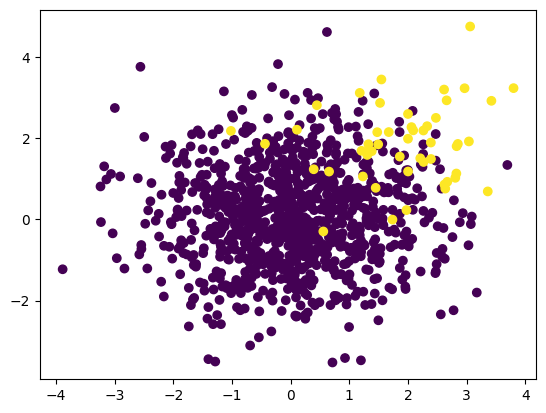

In [19]:
import matplotlib.pyplot as plt

n0 = 1000
n1 = 50

np.random.seed(42)
x1 = np.random.randn(n0, 2) * 1.2
x2 = np.random.randn(n1, 2) + [2, 2]

x = np.vstack([x1, x2])
y = np.array([0] * n0 + [1] * n1)

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

In [20]:
splits_stratified = split_to_k_folds(x, y, k=5, stratify=True)
splits = split_to_k_folds(x, y, k=5, stratify=False)

Przeprowadź walidację krzyżową dla klasyfikatora `GaussianNB` na danych z poprzedniego kroku. Porównaj wyniki dla obu wariantów podziału danych. Na podstawie obserwacji z poprzedniego zadania, wybierz miary oceny klasyfikatora, które uznasz za najbardziej adekwatne do tego zadania. 

Poniższą komórkę możesz dowolnie modyfikować, aby np. obliczać kilka miar jednocześnie. 

In [21]:
def to_one_hot(y, num_classes=None):
    """
    Funkcja konwertująca etykiety na format one-hot.
    
    Args:
    - y (np.ndarray): Wektory etykiet (1D, np.array) z wartościami klas.
    - num_classes (int): Liczba klas. Jeśli None, funkcja ustali liczbę klas na podstawie danych wejściowych.
    
    Returns:
    - np.ndarray: Macierz one-hot o wymiarach (n_samples, num_classes).
    """
    if num_classes is None:
        num_classes = np.max(y) + 1
    
    one_hot = np.zeros((y.shape[0], num_classes), dtype=int)
    one_hot[np.arange(y.shape[0]), y] = 1
    
    return one_hot

In [22]:
from sklearn.naive_bayes import GaussianNB

metrics = []

for (x_train, y_train), (x_test, y_test) in splits:
    model = GaussianNB()
    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    # Convert to the appropriate type
    y_test_one_hot = to_one_hot(y_test)
    y_hat_one_hot = to_one_hot(y_hat)
    metrics.append(
        balanced_accuracy(y_test_one_hot, y_hat_one_hot)
    )

print(f"Splits: {np.mean(metrics): .4f} +/- {np.std(metrics): .4f}")

metrics = []

for (x_train, y_train), (x_test, y_test) in splits_stratified:
    model = GaussianNB()
    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    y_test_one_hot = to_one_hot(y_test)
    y_hat_one_hot = to_one_hot(y_hat)
    metrics.append(
        balanced_accuracy(y_test_one_hot, y_hat_one_hot)
    )

print(f"Splits stratified: {np.mean(metrics): .4f} +/- {np.std(metrics): .4f}")

Splits:  0.8449 +/-  0.0144
Splits stratified:  0.8700 +/-  0.1066


### Pytania

Odpowiedz na pytania:
1. Jaka była Twoja motywacja do wybrania konkretnych miar klasyfikacji?
2. Dla jakich danych warto zastosować stratyfikację podczas walidacji krzyżowej?
3. Jakie ryzyko niesie za sobą losowy podział danych na dwa zbiory (treningowy i testowy), zamiast używania walidacji krzyżowej ze stratyfikacją?

1. Balanced Accuracy i G-mean to dobre miary, szczególnie w przypadku niezbilansowanych danych. Balanced Accuracy uwzględnia dokładność dla każdej klasy, traktując je równorzędnie, co pomaga uniknąć błędnych wniosków przy dominacji jednej klasy. G-mean jest również odpowiedni, ponieważ łączy dokładność w obu klasach, minimalizując błędy zarówno dla klasy pozytywnej, jak i negatywnej. Obie miary pomagają uzyskać bardziej sprawiedliwą ocenę modelu w przypadku niezbilansowanych zbiorów danych (jak wykazano w badaniu danych ze scenariuszy 1-3 z zadania 1).
2. Stratyfikacja jest szczególnie ważna, gdy dane są niezbilansowane. Pomaga utrzymać odpowiednią proporcję klas w zbiorach treningowym i testowym, zapewniając wiarygodniejsze wyniki.
3. Ryzyko losowego podziału może prowadzić do nierównomiernej reprezentacji klas w zbiorze testowym, co daje niestabilne i nierealistyczne wyniki, szczególnie dla danych niezbilansowanych. Może prowadzić to do przeuczenia. Przykładowo model może nauczyć się zawsze przewidywać najczęściej występującą klasę, jeśli w zbiorze testowym pojawiło się zbyt mało kontrprzykładów należących do innych klas. Walidacja krzyżowa ze stratyfikacją zmniejsza to ryzyko.